## Course: CSCE 5215 Machine Learning
## Professor: Zeenat Tariq
## Assignment: 2

**Instructions**:
1. Wherever you are asked to code, insert a text block below your code block and explain what you have coded as per your own understanding.
2. If the code is provided by us, execute it, and add below a text block and provide your explanation in your own words.
3. Submit both the .ipynb and pdf files to canvas.
4. **The similarity score should be less than 15%.**

#Task 1: SVM (25 %)
### Explain SVM and its components (support vectors, hyperplanes, etc)

ANS:
**SVM** also known as **Support Vector Machine** is a supervised learning algorithm used to solve classification and regression problems. It is particularly used to solve binary classification where the elements are classified into two classes.
With the help of SVM, we can find the maximum margin where the distance between the closest elements in each category in 2 classes. It can be done by finding the hyperplane
Below are some of the components of SVM:
- **Support Vectors**: The points that are closest to the decision boundary is classed as support vectors. Using support vectoes we can find the correct poition of the hyperplane.

- **Hyperplane**: Hyperplane is a special line drawn that's placed exactly in the middle of two classes to keep the most distacnce between two classes. Hyperplane helps in predictions or decisions about noew points/data.

- **Margin**: In SVM, margin is the distanct between the hyperplane and the nearest data points from each class. It is the smallest perpendicular distance from the hyperplane to the closest data points.

- **Kernal Function**: The kernal function is used to convert the data into higher dimension space where the hyperplane can be found easily that separated the classes.

### Explain the concept of the kernel in SVM. How does it enable SVM to handle non-linearly separable data?

ANS: In SVM, a kernel allows an algorithm to handle data that can't be easily separated by a straight line. Kernal transforms the data into higher dimensions space where the data might be easily separable. There are different types of kernels, like RBF (radial basis function/ Gaussian) kernel, linear kernel, and polynomial kernel.

So, in other words, the kernel is like a tool that helps us take at data from different perspectives/ angles, making it easier to separate data that cannot be separated using a straing linein lower dimension.


## Implement the below code and provide an explanation for the code(each section) as per your understanding





### Import the necessary libraries for SVM implementation

In [1]:
# Use this cell to import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV


- Importing all the libraries required in this implementation from pandas (For numeric calculations), mathplotlib (For visualization), and sklearn ( Classification, regression, etc)

### Load the Dataset.
### you can choose any dataset from publicly available datasets.
Split the dataset into X and y.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
# dataset = https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

file_path = '/content/drive/MyDrive/ColabNotebooks/citrus.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['name'])
y = data['name']


- In the above code we are separating features and targets.
- Here the target is 'name'

In [4]:
# Provide a description of the dataset, including the mean, standard deviation, and median of each column.
print(data.describe())

           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


- The above code prints a description of the data i.e., mean, standard deviation, median, etc

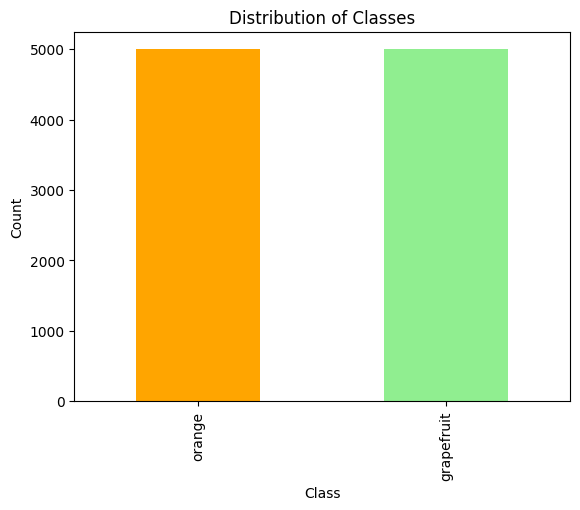

In [5]:
# Create a bar chart for the label/class column using the dataset
data['name'].value_counts().plot(kind='bar',color = ['orange', 'lightGreen'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

- The above code plots the graph for labels/class columns in different colors which shows the count of `orange` and `grapefruit`

### Create a dataframe(df) from X and y. Display the tail of df.




In [6]:
df = pd.concat([X, pd.Series(y, name='label')], axis=1)
df.tail()

,diameter,weight,red,green,blue,label
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit
9999,16.45,261.51,152,74,2,grapefruit


- This code combines a dataset `X` with a list of labels `y`, creating a new dataset `df` with the labels in a column named 'label'.

### Handle missing values

In [7]:
# Check if the dataset has null or missing values and handle them
missing_values = data.isnull().sum()
data.fillna(data.mean(numeric_only=True), inplace=True)
missing_values_after_handling = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)
print("\nMissing values after handling:")
print(missing_values_after_handling)

Missing values before handling:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

Missing values after handling:
name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64


- The above code finds if there are any missing values in the dataset and handles them.
- For this dataset, there are no missing values.




### Encoding Categorical Features. If your dataset contains categorical variables, you may need to encode them as numerical values before using them with SVM.

In [8]:
# Use this cell for encoding categorical Features.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

- The above code changes the categorical data in `y` into numeric values using LabelEncoder.

### Feature Scaling:

SVMs are sensitive to the scale of features, so it's often beneficial to scale the features to a similar range. Common scaling techniques include standardization (subtracting the mean and dividing by the standard deviation) or normalization (scaling values to a range of 0 to 1).

Visualize the range of each feature. If the range is too high then apply feature scaling. Atleast apply feature scaling for 2 features if possible.

In [9]:
# Use this cell for feature scaling

#Features to scale
features_to_scale = ['diameter', 'weight']

scaler = StandardScaler()

X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

print(X)

      diameter    weight  red  green  blue
0    -3.601950 -3.022554  172     85     2
1    -3.114207 -2.978392  166     78     3
2    -2.852366 -2.734645  156     81     2
3    -2.826695 -2.719925  163     81     4
4    -2.821561 -2.714447  161     72     9
...        ...       ...  ...    ...   ...
9995  2.759248  2.698988  149     77    20
9996  2.790053  2.725690  148     68     7
9997  2.882467  2.788339  168     82    20
9998  3.051894  2.912951  142     72    11
9999  3.324003  2.959851  152     74     2

[10000 rows x 5 columns]


- The above code rescales diameter and weight making it more suitable for analysis.

### Split the data into Training and Testing sets 70% and 30% using train_test_split function


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

- Splitting the dataset into test dataset (30%) and train dataset (70%).

### Create a SVM classifier object

In [11]:
SVM = SVC(kernel='linear')

- The above code uses a linear kernel and initializes the SVM.

### Fit the training data into the model using fit function

In [12]:
# Train the SVM classifier
SVM.fit(X_train, y_train)

SVC(kernel='linear')

- It fits the training X and training Y dataset into SVM

### Using the predict function, make prediction on test data.

In [13]:
# Make predictions on the test set
y_pred = SVM.predict(X_test)

- By using the test dataset we are making predictions in SVM.

### Evaluate the performance of the SVM classifier on the testing set.
Calculate accuracy, precision, recall and F1-score using Scikit Learn Library

In [14]:
# Use this cell for calculation of evaluation metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9576666666666667
Precision: 0.9587531981301491
Recall: 0.9576666666666667
F1 Score: 0.9576415857789573


- The performance of the model is evaluated using an evaluation matrix i.e., Accuracy, precision, Recall, and F1 Scores.

### Hyperparameter Tuning  
Experiment with different values of hyperparameters in SVM, such as the choice of kernel (linear, polynomial, radial basis function), regularization parameter (C), and kernel parameters (degree, gamma).

Create four models with different sets of hyperparameters and report the best hyperparameters found and compare the performance of the SVM classifier using these hyperparameters with the default hyperparameters (Use bar chart to compare the accuracies of the models).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# hyperparameter combinations
hyperparameter_combinations = [
    {'kernel': 'linear', 'C': 0.1, 'degree': 2, 'gamma': 0.1},
    {'kernel': 'linear', 'C': 1, 'degree': 3, 'gamma': 1},
    {'kernel': 'rbf', 'C': 1, 'degree': 3, 'gamma': 'scale'},
    {'kernel': 'poly', 'C': 10, 'degree': 4, 'gamma': 'scale'}
]

# To store best hyperparameter and accuracy
best_hyperparameters = {}
best_accuracy = 0

# List to store the accuracies of different models
accuracies = []

# Experiment with different hyperparameter combinations
for hyperparameters in hyperparameter_combinations:

    svm_model = SVC(**hyperparameters)
    svm_model.fit(X_train, y_train)

    # Predictions on the test dataset
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Add accuracy in the accuracies list
    accuracies.append(accuracy)

    # Compare accuracy to find the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameters

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'kernel': 'linear', 'C': 1, 'degree': 3, 'gamma': 1}
Best Accuracy: 0.9576666666666667


- Experimenting by passing different hyperparameter values to find the best hyperparameter combination.
- `accuracies` stores all the accuracy to compare for the best combination.
- Finally printing the best combination of hyper-parameters and best accuracy.

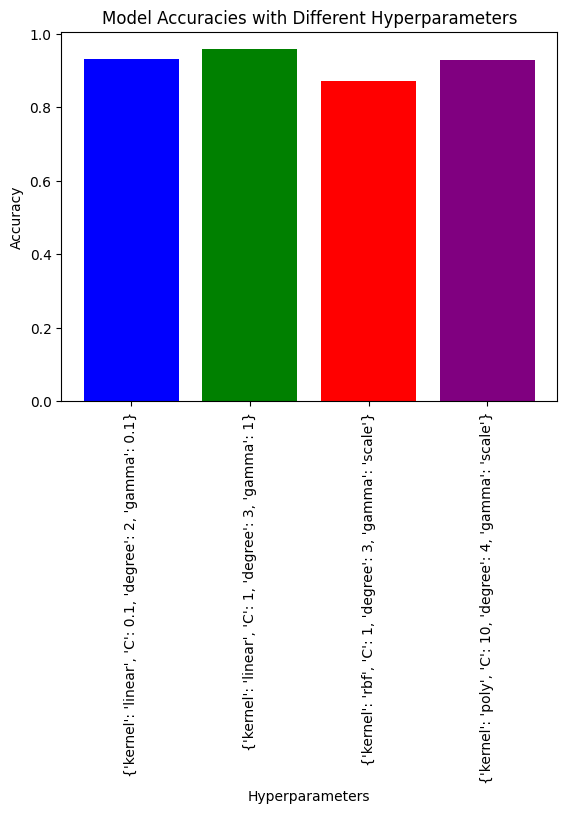

In [16]:
# Bar chart to compare the accuracies of the models
hyperparameters_labels = [str(hyperparameters) for hyperparameters in hyperparameter_combinations]
x = np.arange(len(hyperparameters_labels))
bar_colors = ['blue', 'green', 'red', 'purple']
plt.bar(x, accuracies,color=bar_colors)
plt.xlabel("Hyperparameters")
plt.ylabel("Accuracy")
plt.title("Model Accuracies with Different Hyperparameters")
plt.xticks(x, hyperparameters_labels, rotation=90)
plt.show()

- The above is the bar graph which compares all the accuracies of the different combinations of hyperparameters that were taken.
- As you can see the green one has the highest accuracy.

In [17]:
# Display the confusion matrix and the evaluation metrics mentioned above

# Create SVM for best hyperparameter
best_svm_model = SVC(kernel='linear', C= 1, degree= 3, gamma= 1)

# Train the model for best hyperparameters
best_svm_model.fit(X_train, y_train)

# Predicting on test dataset
y_pred_best = best_svm_model.predict(X_test)

# Calculate Confusion Matric
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Evaluation metrics calculation
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[1473   27]
 [ 100 1400]]
Accuracy: 0.9576666666666667
F1 Score: 0.9576415857789573
Precision: 0.9587531981301491
Recall: 0.9576666666666667


- Considering the best hyperparameters that we got in the above experiment, we find the confusion matrix for that and evaluation metric which is Accuracy, F1 score, Precision and Recall.

# Task 2: Linear Regression (25 %)

### 1) How does Gradient Descent work in the context of optimization?
### 2) What are the differences between convex and non-convex?

ANS:

1.
Gradient Descent is a way to find the lowest point of a curve or suface.
Let suppose your are in a hilly area, and you wnat to go down to lowest point.
Here's how Gradient Descent works:
  - You start at some random point on the hill.
  - You look around to figure out which way is downhill because you want to go toward the minimum point i.e., lowest point.
  - You take a downhill direction. The size of your step is like how big of a step you are willing to take, if you take big steps, you might miss the minimum and if you take small steps it may take too long to reach the minimum.
  - You repeat it, you look around, take a step towards the minimum, and keep doing this until you can't go down anymore.

  Gradient Desent is a way to find the best slution by adjusting your position step by step until you cab't go any lower.

  This method is widely used in machine learning and optimization problems to find the best values for things, like the right weights for a neural network, minimize error or cost function.



 2.
 Convex and non-convex are used to describe the shape of the function.

  **Convex**:

  - A function that has just one minimum is called a convex.
  - They are easy to solve and efficient in finding the global minimum.

  **Non-Convex**

  - A function that has multiple minimum is called as non-convex.
  - They are complex to solve and do not guarantee to find the global minimum.


### Implement Linear Regression from scratch using gradient descent. Make sure to train it for several iterations with different learning rates.


In [18]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=10):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.random(n_features)
        self.bias = np.random.random(1)
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


- The above is the implementation of Linear regression.

### 1) Loading data from kaggle

In [19]:
# dataset = https://www.kaggle.com/datasets/parvmodi/cgpa-vs-package-in-lpa
file_path = '/content/drive/MyDrive/ColabNotebooks/placement.csv'

# Load data
data = pd.read_csv(file_path)

data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


- Loading the dataset from Kaggle which contains cgpa and package.

### 2) Splitting the dataset

In [20]:
X = data.drop(columns=['package'])
y = data['package']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

- Split the dataset into 30% test and 70% train dataset.

### 3) Create an instance of the LinearRegression class with different learning rates, and then fit the model.

In [21]:
# Different Learning rates
learning_rates = [0.01, 0.001, 0.0001]

# Store all the results
results = []

# Calculate the results of each learning rate
for lr in learning_rates:
    reg = LinearRegression(lr=lr, n_iters=1000)
    reg.fit(X_train, y_train)
    y_predictions = reg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_predictions)
    r2 = r2_score(y_test, y_predictions)

    results.append((lr, mse, r2))



- Evaluating the model using different learning rates and storing the results into `restults`.

### 4) Evaluate your model's performance

In [22]:
for lr, mse, r2 in results:
    print(f"Model with learning rate {lr}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

Model with learning rate 0.01:
Mean Squared Error: 0.14475948470431538
R-squared Score: 0.7007538688505042

Model with learning rate 0.001:
Mean Squared Error: 0.14759224860814374
R-squared Score: 0.6948979925297776

Model with learning rate 0.0001:
Mean Squared Error: 0.179418038448077
R-squared Score: 0.629107868312148



- Evaluating the model using Mean-square error and R-square Score.
- Printing the values for different learning rates to compare the values.

### Explain your evaluation matrix. What do you know about it?

ANS:

Evaluation metric is used to measure how well the model is performing. They help us to understand if our predictions or classifications are accurate and reliable.
Below are some key evaluation metrics:
- Accuracy: It calculates the ratio of correct predictions or classifications out of the total predictions.
- Precision: It is about the accuracy of positive predictions. It calculates the ratio of true positive predictions out of all the positive predictions (true positive and false positive included)
- Recall: It calculated the ratio of true positives out of all actual positive cases.
- F1 score: It is the combination of precision and recall. It is used to ensure a balance between how the model is with positive predictions and all the actual positives.
- Mean Squared Error (MSE): It is commonly used for regression tasks.



### Implement Linear Regression from the scikit-learn library and perform hyperparameter tuning, following steps 1 to 4.

In [23]:
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter combinations
hyperparameter_combinations = [
    {'fit_intercept': True, 'positive': True, 'copy_X':True},
    {'fit_intercept': True, 'positive':False, 'copy_X': False},
    {'fit_intercept': False, 'positive': False, 'copy_X':True}
]

# Store best result
best_model = None
best_mse = float('inf')
best_r2 = None

# Loop through hyperparameter combinations
for params in hyperparameter_combinations:
    model = LinearRegression(**params)
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, y_predictions)
    r2 = r2_score(y_test, y_predictions)

    print(f"Model with hyperparameters {params}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

    if mse < best_mse:
        best_mse = mse
        best_r2 = r2
        best_model = model

print("Best Model:")
print(f"Mean Squared Error: {best_mse}")
print(f"R-squared Score: {best_r2}")


Model with hyperparameters {'fit_intercept': True, 'positive': True, 'copy_X': True}:
Mean Squared Error: 0.08417638361329668
R-squared Score: 0.773098431205167

Model with hyperparameters {'fit_intercept': True, 'positive': False, 'copy_X': False}:
Mean Squared Error: 0.08417638361329656
R-squared Score: 0.7730984312051673

Model with hyperparameters {'fit_intercept': False, 'positive': False, 'copy_X': True}:
Mean Squared Error: 1.04939477057705
R-squared Score: -1.8286950508932804

Best Model:
Mean Squared Error: 0.08417638361329656
R-squared Score: 0.7730984312051673


- This time we are using LinearRegression from scikit-learn library.
- We perform the hyperparameter tuning using different hyperparameter combinations to find the best Model based on mse.

### Compare the performance of the two models

ANS:
- When we use hyperparameter tuning the model performs better when compared to without hyperparameter tuning.
- MSE means the prediction is off when it is squared and without hyperparameter the value is 0.134 and with a hyperparameter is 0.084 which is better because higher value indicates less accuracy.

# Task 3: Logistic Regression (25 %)

### What is the difference between the sigmoid function and softmax?

**Sigmoid function**:

Sigmoid functions are used to compress any value between 0 and 1. It is often used in binary classification preoblem where you want to decie between juct two opitons like "yes" or "no", "spam" or "not spam".

**Softmax Function**:

Softmax functions are used where there are more than two categories to choose form, like classifying animals into 'cat', 'dog', 'lion', etc. The softmax function takes a bunch of numbers and turn them into probabilities.


### Implement Logistic Regression from scratch using gradient descent.

In [24]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=10, model=None, threshold=0.5):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        n_samples, n_features = X.shape

        if self.model == 'sigmoid':
            self.weights = np.random.random(n_features)
            self.bias = np.random.random(1)
        elif self.model == 'softmax':
            num_classes = len(np.unique(y))
            self.weights = np.random.random((n_features, num_classes))
            self.bias = np.random.random((1, num_classes))

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.select_activation(linear_model)

            if self.model == 'sigmoid':
                y_predicted_cls = [1 if i > self.threshold else 0 for i in y_predicted]
                y_diff = y_predicted - y
            elif self.model == 'softmax':
                y_one_hot = np.eye(num_classes)[y]
                y_diff = y_predicted - y_one_hot

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, y_diff)
            db = (1 / n_samples) * np.sum(y_diff, axis=0)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.select_activation(linear_model)

        if self.model == 'sigmoid':
            y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        elif self.model == 'softmax':
            y_predicted_cls = np.argmax(y_predicted, axis=1)

        return np.array(y_predicted_cls)

    def select_activation(self, x):
        if self.model == "sigmoid":
            return 1 / (1 + np.exp(-x))
        else:
            exp_z = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_z / exp_z.sum(axis=1, keepdims=True)


- The above is the implementation of Logistic regression from scratch.

### 1) Loading data from kaggle

In [25]:
# Load the data
# Dataset = https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
file_path = '/content/drive/MyDrive/ColabNotebooks/wine.csv'
data = pd.read_csv(file_path)
print(data.describe())
data['quality'] = data['quality'].replace({'good': 1, 'bad': 0})
X = data.drop('quality', axis=1)
y = data['quality']

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

- Loading wine-quality binary classification dataset from Kaggle and assigning the target feature as 'quality'.
- Quality contains 2 values i.e., `good` and `bad`, so we first change the binary classification to integer values i.e., `good`: 1 and `bad`: 0.


### 2) Splitting the dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify = y)

- Splitting the dataset into 30% test dataset and 80% as a train dataset.

### 3) Create an instance of the Logistic Regression class with different learning rates, and then fit the model.  Use the sigmoid and softmax functions to get the prediction. Make sure you train it for some iteration with different learning rates


In [27]:
learning_rates = [0.01, 0.001, 0.0001]
models = ['sigmoid', 'softmax']

results = {}

for lr in learning_rates:
    for model in models:
        logreg = LogisticRegression(learning_rate=lr, n_iters=1000, model=model)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred)

        # Store the results in the dictionary
        results[(lr, model)] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

- Testing out different combination of learning rates and models (sigmoid, softmax) and training the LogisticRegression function that we created.

### 4) Evaluate your model's performance

In [28]:
for (lr, model), metrics in results.items():
    print(f"Results for Learning Rate = {lr} and Model = {model}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1 Score: {metrics['f1_score']:.2f}")
    print()

Results for Learning Rate = 0.01 and Model = sigmoid:
Accuracy: 0.57
Precision: 0.56
Recall: 0.98
F1 Score: 0.71

Results for Learning Rate = 0.01 and Model = softmax:
Accuracy: 0.57
Precision: 0.55
Recall: 0.98
F1 Score: 0.71

Results for Learning Rate = 0.001 and Model = sigmoid:
Accuracy: 0.57
Precision: 0.58
Recall: 0.72
F1 Score: 0.64

Results for Learning Rate = 0.001 and Model = softmax:
Accuracy: 0.66
Precision: 0.65
Recall: 0.82
F1 Score: 0.72

Results for Learning Rate = 0.0001 and Model = sigmoid:
Accuracy: 0.62
Precision: 0.61
Recall: 0.80
F1 Score: 0.69

Results for Learning Rate = 0.0001 and Model = softmax:
Accuracy: 0.51
Precision: 0.55
Recall: 0.46
F1 Score: 0.50



- Printing the evaluation matrixes for different combinations to compare the best combination of learning rate and model.


### Implement Logistic Regression from the scikit-learn library and perform hyperparameter tuning. Follow steps 1 to 4


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Dataset = https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification
# Load the data
file_path = '/content/drive/MyDrive/ColabNotebooks/wine.csv'
data = pd.read_csv(file_path)
data['quality'] = data['quality'].replace({'good': 1, 'bad': 0})
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Define hyperparameters for tuning
param_grid = {
'C' : [0.1, 0.5, 1],
'solver': ['lbfgs', 'liblinear', 'sag','saga'],
'penalty' : ['l2'],
'class_weight': ['balanced'],
'random_state' : [42,1234],
'max_iter':  [1000000]
}

# Create a Logistic Regression model
logreg = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=logreg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,n_jobs=1)

grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Create a Logistic Regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

# Evaluate the model - Evaluation metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Accuracy: 0.76
Precision: 0.80
Recall: 0.73
F1 Score: 0.76


- The above code uses hyperparameter tuning to increase the efficiency of the model.
- After using the hyperparameter there is a significant increase in the accuracy of the model.
- In the above code I have used different combination of hyperparameters to estimate the best hyperparameter combination.
- The best hyperparameters are printed with the evaluation metric for the best hyperparameters.

# Task 4: Naive Bayes Classifier (25 %)
### What is the main assumption of Naive Bayes classifiers?

ANS:

The main assuption of Naive Bayes classifiers is that the features used to make predictions are all independent of each other. In simple words its saying that when we're trying to make a guess or prediction, we assume that each piece of information we have doesn't affect the others.

## Implement the below code and provide explanation for the code(each section) as per your understanding

### Import the necessary libraries for Naive Bayes classifier implementation



In [30]:
# Use this cell to import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

- The above code imports all the necessary libraries used in Naive Bayes classifier implementation.
- panda - Used for mathematical calculations/operations.
- mathplotlib - For plotting graphs
- sklearn

### Load the Dataset.
### you can choose any dataset from publicly available datasets.
Split the dataset into X and y.

In [31]:
# Load the dataset
# dataset= https://www.kaggle.com/datasets/shahedarman/naive-bayesgaussiannb

file_path = '/content/drive/MyDrive/ColabNotebooks/SP_II_MN.csv'
data = pd.read_csv(file_path)

X = data.drop('Exited', axis=1)
y = data['Exited']


- Loading the dataset from Kaggle for Naive Bayes

### Create a dataframe(df) from X and y. Display the tail of df.


In [32]:
df = pd.DataFrame(data)
df.tail()

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited
9995,15606229,771,1,39,5,0.00,2,96270.64,0
9996,15569892,516,1,35,10,57369.61,1,101699.77,0
9997,15584532,709,0,36,7,0.00,1,42085.58,1
9998,15682355,772,1,42,3,75075.31,2,92888.52,1
9999,15628319,792,0,28,4,130142.79,1,38190.78,0


- Creating a Data Frame and printing the last 5 Rows using .tail() functions.

### Handle missing values

In [33]:
# Check if the dataset has null or missing values and handle them
missing_values = df.isnull().sum()
data.fillna(df.mean(numeric_only=True), inplace=True)
missing_values_after_handling = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)
print("\nMissing values after handling:")
print(missing_values_after_handling)

Missing values before handling:
ID                     0
Score                  0
Sex                    0
Age                    0
Authority              0
Money                  0
Product no             0
Balance (estimated)    0
Exited                 0
dtype: int64

Missing values after handling:
ID                     0
Score                  0
Sex                    0
Age                    0
Authority              0
Money                  0
Product no             0
Balance (estimated)    0
Exited                 0
dtype: int64


- Printing all the missing values in the dataset and handling if there are any missing values.
- The dataset does not have any missing values in any feature.




### Encoding Categorical Features. If your dataset contains categorical variables, you may need to encode them as numerical values before using them with Naive Bayes.

In [34]:
# Use this cell for encoding
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)


- The above code is used to encode the 'sex' fetaure.
- Encoding means changing the categorical features into numeric values.

### Split the data into Training and Testing sets 70% and 30% using train_test_split function

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- 30% of the dataset is split into test data and 70% as a training dataset.

### There are three main types of Naive Bayes models commonly used:
* Gaussian Naive Bayes
* Multinomial Naive Bayes
* Bernoulli Naive Bayes

These three variants of Naive Bayes models differ in their assumptions about the underlying distribution of the features and the way they estimate the probabilities for classification. The choice of the Naive Bayes variant depends on the nature of the features in your dataset. Gaussian Naive Bayes is suitable for continuous features, while Multinomial Naive Bayes and Bernoulli Naive Bayes are appropriate for discrete or binary features.

### Create a Naive Bayes classifier object using ONLY one of the Naive Bayes model types

Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes can all be used to create a Naive Bayes classifier object. Select one, and explain your decision to use that specific naive bayes classifier.
https://scikit-learn.org/stable/modules/naive_bayes.html
Use this link to get the code for Naive Bayes classifier.

- I choose Gaussian Naive Bayes because the data is continuous variables associated with features.

In [36]:
# Create naive bayes classifier object
naive_bayes_model = GaussianNB()

- Initializing the Gaussian Naive Bayes

###Fit the training data into the model using fit function

In [37]:
# Train the classifier
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

### Using the predict function, make prediction on test data.

In [38]:
# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

- Making predictions using the predict function on test dataset.

### Evaluate the performance of the Naive Bayes classifier on the testing set.
Calculate accuracy, precision, recall and F1-score using Scikit Learn Library

In [39]:
# Use this cell for calculation of evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

- Calculating the Evaluation metric i.e., accuracy, precision, recall and f1 score.

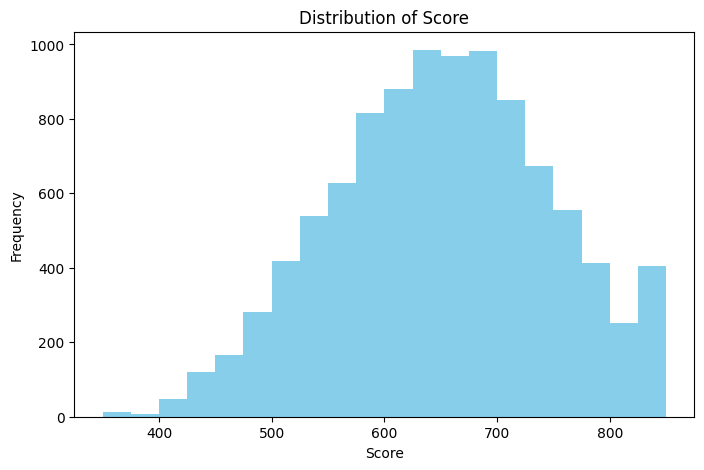

            ID  Score  Sex  Age  Authority      Money  Product no  \
9995  15606229    771    1   39          5       0.00           2   
9996  15569892    516    1   35         10   57369.61           1   
9997  15584532    709    0   36          7       0.00           1   
9998  15682355    772    1   42          3   75075.31           2   
9999  15628319    792    0   28          4  130142.79           1   

      Balance (estimated)  Exited  
9995             96270.64       0  
9996            101699.77       0  
9997             42085.58       1  
9998             92888.52       1  
9999             38190.78       0  
Accuracy: 0.791
Precision: 0.328
Recall: 0.0702054794520548
F1 Score: 0.1156558533145275


In [40]:
#Use this cell for Visualization
plt.figure(figsize=(8, 5))
plt.hist(df['Score'], bins=20, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')
plt.show()

# Display the tail of the DataFrame
print(df.tail())

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

- The above code uses matplotlib for visualization i.e., plotting a graph between score and frequency and displaying the Evaluation metric.